# Plot result from "A multiscale model of pulmonary micrometastasis and immune surveillance: towards cancer patient digital twins"

In [1]:
import ipywidgets as widgets
from DataSet import Loading_dataset, Classifier_Simulations, Classifier_Patients, Normalize_Parameters, T_test, MannWhitneyU_test, Fitter_dist, Loading_UMAP_traj
from Plot_Population import plot_PopCells, plotSamplesMicroEnv
from Plot_Patients import plot_Parameters, plot_Patients, plot_PatientAnalysis, NameParameters, plot_UMAP, plot_UMAP_MeanPatients
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

#### Downloading and Loading dataset 

In [2]:
df_input, df_output = Loading_dataset()

## 1. Cell population of virtual patients

Cell population in lymph node and in the microenvironment for 10k samples (patients), mean and standard deviation for 10 replicates. 

In [3]:
widgets.interact(plot_PopCells,df_output=widgets.fixed(df_output), sampleID=widgets.BoundedIntText(min=0, max=9999, step=1, value=6, description='Patient: '), FontSize=widgets.fixed(None), FigName=widgets.fixed(None), Vertical=widgets.fixed(None), replicateID=widgets.fixed(None))

interactive(children=(BoundedIntText(value=6, description='Patient: ', max=9999), Output()), _dom_classes=('wi…

<function Plot_Population.plot_PopCells(df_output, sampleID, FontSize=None, FigName=None, Vertical=None, replicateID=None)>

#### Cell population of Patients: 2, 93, and 5

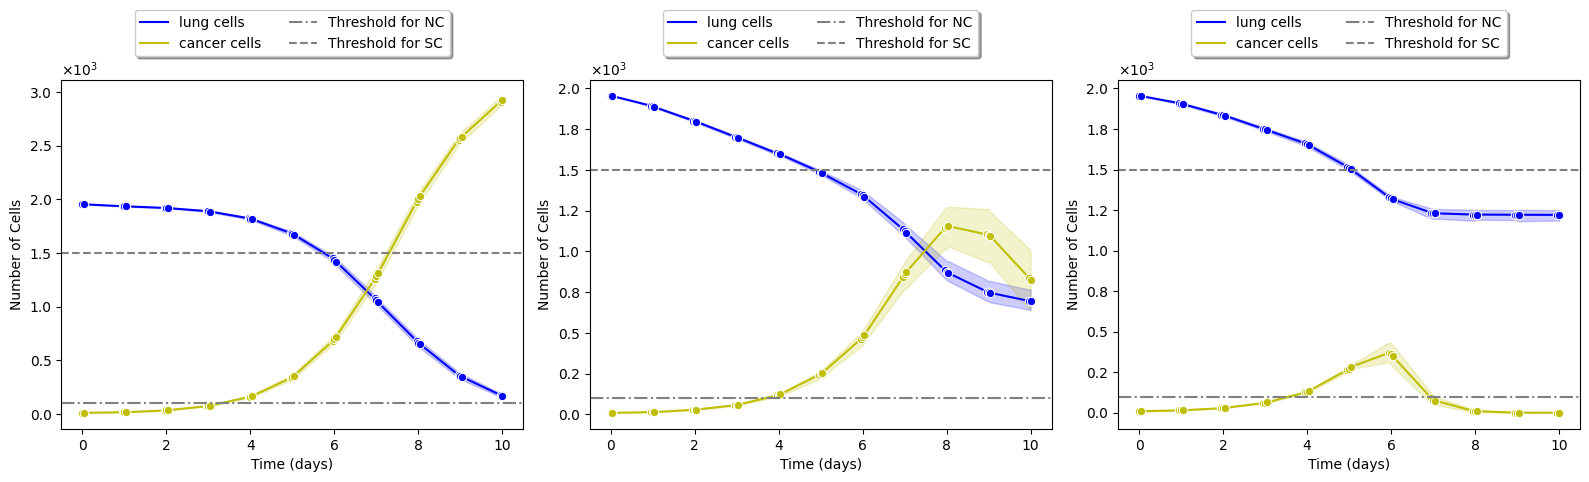

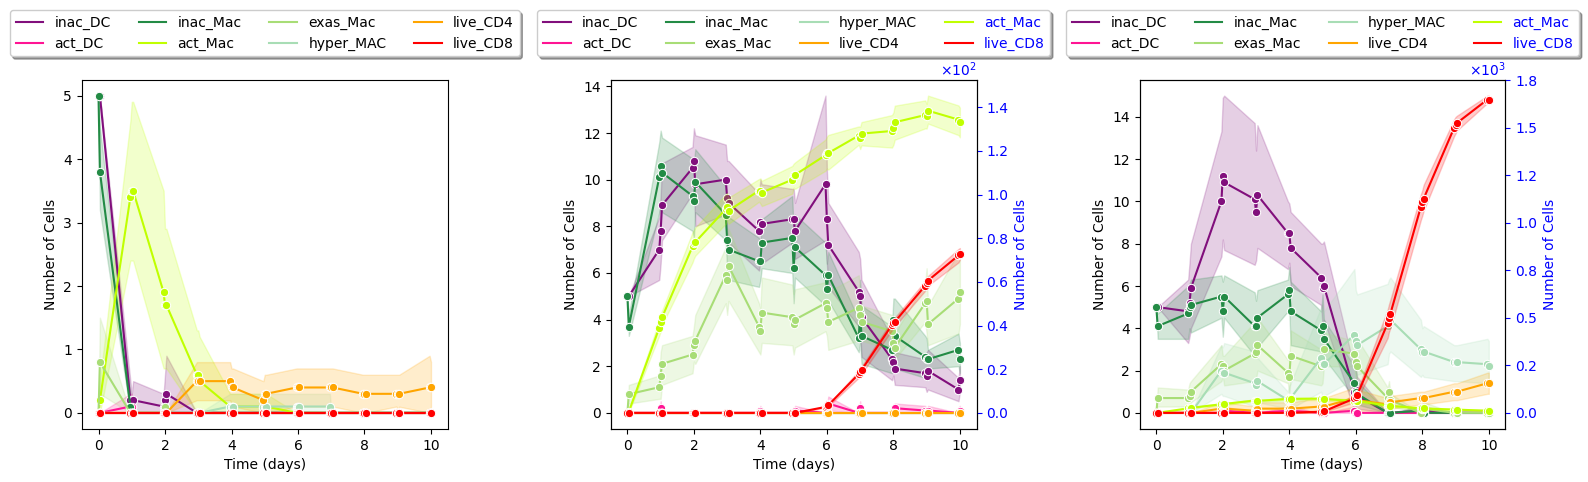

In [4]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(16, 5))
fig2, (ax11,ax12,ax13) = plt.subplots(1,3,figsize=(16, 5))
plotSamplesMicroEnv(df_output, 2,ax1,ax11)
plotSamplesMicroEnv(df_output, 93,ax2,ax12)
plotSamplesMicroEnv(df_output,5,ax3,ax13)
# set the spacing between subplots
fig.tight_layout()
fig2.tight_layout()
plt.show()

## 2. Labeling patients
### 2.1 Labeling based on threshold

* Labeling based on cancer cell population at day 10 (last time) for all 100k simulations. The thresholds chosen in the last point were 100 and 1500 cells, defining the Significant Control (SC), Marginal Control (MC), and No Control (NC).
* Grouping the simulations in 10,000 patients and labeling them into 7 different classes {NC,MC,SC,NC+MC,NC+SC,MC+SC,NC+MC+SC}
* Regrouping patients into 3 classes, considering the mixed class as the union of {NC+MC,NC+SC,MC+SC,NC+MC+SC}.

In [5]:
Sim_df_lastFrame = Classifier_Simulations(df_output)
Pat_df_7classes, Pat_df_3classes = Classifier_Patients(Sim_df_lastFrame)

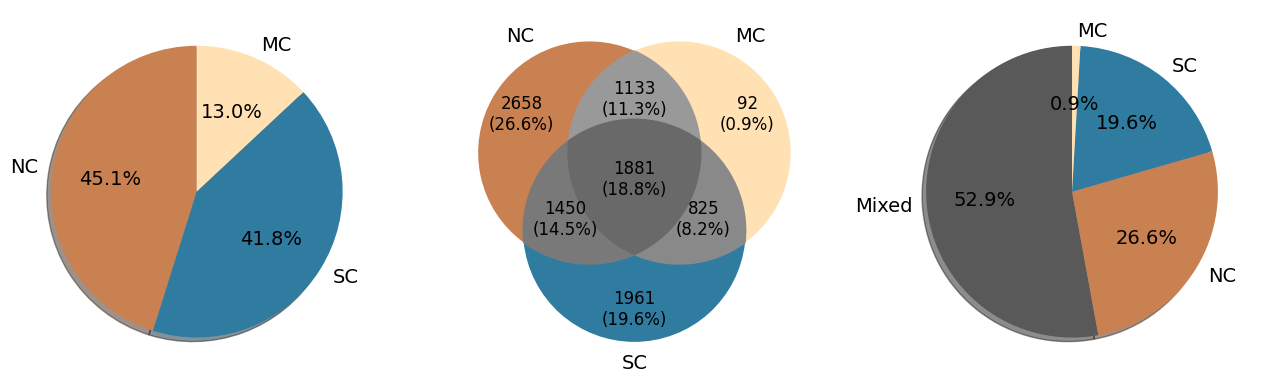

In [6]:
plot_Patients(Sim_df_lastFrame,Pat_df_7classes,Pat_df_3classes, Title=False)

#### 2.1.1 Parameters space according the labels

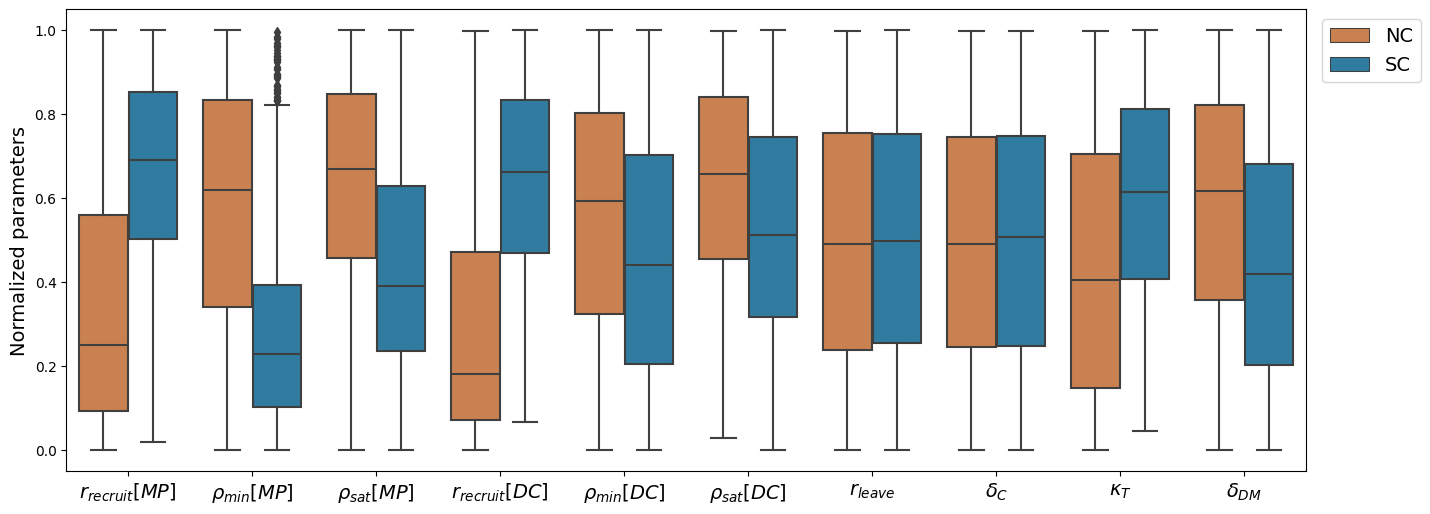

In [7]:
df_input_min_max_scaled = Normalize_Parameters(df_input, Pat_df_3classes)
plot_Parameters(df_input_min_max_scaled)

Perform T-test

In [8]:
T_test(df_input_min_max_scaled)

,macrophage_max_recruitment_rate,macrophage_recruitment_min_signal,macrophage_recruitment_saturation_signal,DC_max_recruitment_rate,DC_recruitment_min_signal,DC_recruitment_saturation_signal,DC_leave_prob,TC_death_rate,T_Cell_Recruitment,DM_decay
t-stat,-4.014013e+01,3.947799e+01,2.809268e+01,-45.8827,1.162551e+01,1.543151e+01,-0.579423,-0.545542,-2.001633e+01,1.588502e+01
p-value,1.766140e-302,5.952549e-294,1.908225e-160,0.0000,8.183805e-31,2.006148e-52,0.562332,0.585407,1.536341e-85,2.302039e-55


Perform Mann-Whitney U test

In [9]:
MannWhitneyU_test(df_input_min_max_scaled)

,macrophage_max_recruitment_rate,macrophage_recruitment_min_signal,macrophage_recruitment_saturation_signal,DC_max_recruitment_rate,DC_recruitment_min_signal,DC_recruitment_saturation_signal,DC_leave_prob,TC_death_rate,T_Cell_Recruitment,DM_decay
MWU-stat,1.060641e+06,4.117171e+06,3.765743e+06,890160.0,3.117079e+06,3.260022e+06,2.579874e+06,2.581857e+06,1.760681e+06,3.296823e+06
p-value,7.783210e-261,2.090052e-249,9.773643e-148,0.0,3.945345e-30,2.979187e-48,5.572217e-01,5.873318e-01,1.871470e-79,1.248712e-53


Fit distrubutions to the parameters

(array([0.05204592, 0.15613776, 0.        , 0.        , 0.10409184,
        0.        , 0.        , 0.10409184, 0.15613776, 0.20818368,
        0.10409184, 0.31227552, 0.2602296 , 0.15613776, 0.10409184,
        0.46841328, 0.46841328, 0.62455103, 0.41636736, 0.36432144,
        0.36432144, 0.41636736, 0.41636736, 0.67659695, 0.83273471,
        0.62455103, 0.52045919, 0.31227552, 0.67659695, 0.67659695,
        0.83273471, 0.57250511, 0.67659695, 0.72864287, 0.46841328,
        1.04091839, 0.52045919, 0.83273471, 1.09296431, 0.83273471,
        1.09296431, 0.78068879, 0.78068879, 0.72864287, 0.88478063,
        0.83273471, 0.98887247, 1.14501023, 0.93682655, 0.98887247,
        1.40523983, 1.04091839, 1.76956126, 0.83273471, 1.66546942,
        1.56137758, 1.76956126, 1.30114799, 0.78068879, 1.19705615,
        1.6134235 , 1.6134235 , 1.40523983, 0.83273471, 1.40523983,
        1.09296431, 1.50933166, 1.04091839, 1.56137758, 1.6134235 ,
        1.04091839, 1.45728575, 1.35319391, 1.56

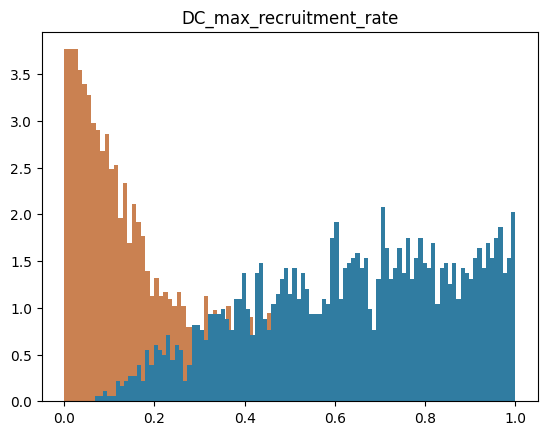

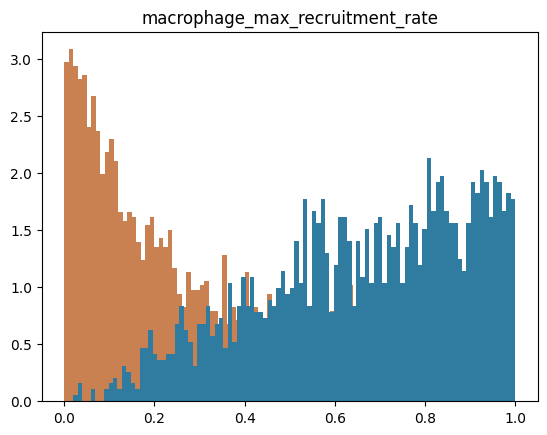

In [10]:
from Plot_Patients import colours
dic_Fit = Fitter_dist(df_input_min_max_scaled)
# dic_Fit['DC_max_recruitment_rateNC'].summary(plot=True)
plt.figure()
plt.title("DC_max_recruitment_rate")
Par1_NC = dic_Fit['DC_max_recruitment_rateNC']; Par1_SC = dic_Fit['DC_max_recruitment_rateSC']
plt.hist(Par1_NC._data, bins=Par1_NC.bins, density=Par1_NC._density, color= colours['NC'])
plt.hist(Par1_SC._data, bins=Par1_SC.bins, density=Par1_SC._density, color= colours['SC'])

plt.figure()
plt.title("macrophage_max_recruitment_rate")
Par2_NC = dic_Fit['macrophage_max_recruitment_rateNC']; Par2_SC = dic_Fit['macrophage_max_recruitment_rateSC']
plt.hist(Par2_NC._data, bins=Par2_NC.bins, density=Par2_NC._density, color= colours['NC'])
plt.hist(Par2_SC._data, bins=Par2_SC.bins, density=Par2_SC._density, color= colours['SC'])

#### 2.1.2 Patients Variation

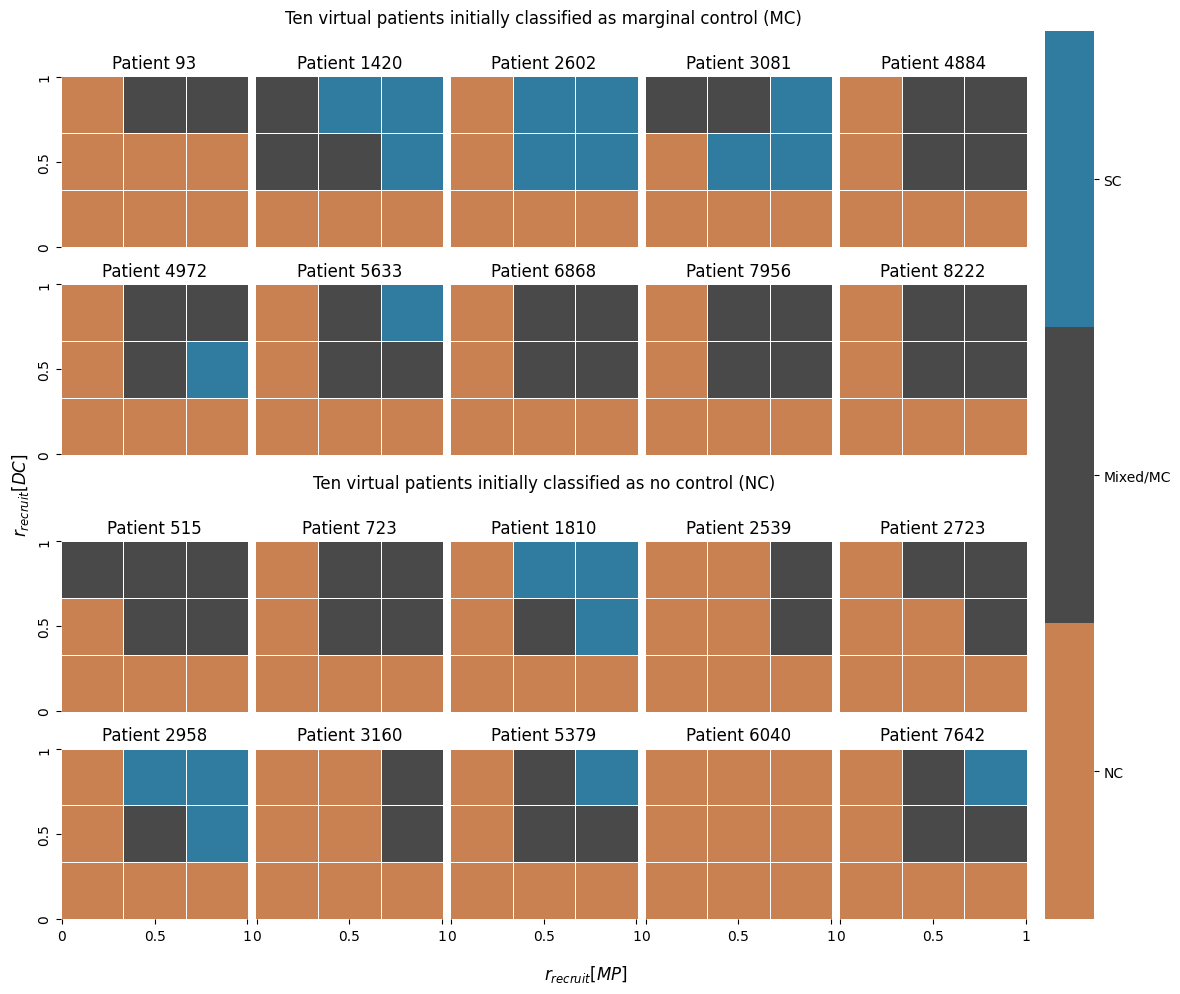

In [11]:
plot_PatientAnalysis()

### 2.2 Labeling based on image trajectories

Applying dimensionality reduction in image frames trajectories (concatenated images over time, matrix shape =$(100k, 2325)$, 31 RGB images $5\times 5$ overtime) using Uniform Manifold Approximation and Projection (UMAP).

       sample  replicate      UMAP1     UMAP2 label  probabilities
0           0          0   6.501526  4.371171     1            1.0
1           0          1   6.202521  4.076374     1            1.0
2           0          2  13.683423  3.262182     0            1.0
3           0          3  14.743344  3.518149     0            1.0
4           0          4  13.972880  0.397476     0            1.0
...       ...        ...        ...       ...   ...            ...
99995    9999          5  12.416154 -0.079478     0            1.0
99996    9999          6  14.225667  3.084561     0            1.0
99997    9999          7   6.423583  7.284491     1            1.0
99998    9999          8  13.938170 -0.096351     0            1.0
99999    9999          9  14.563489  2.276777     0            1.0

[100000 rows x 6 columns]


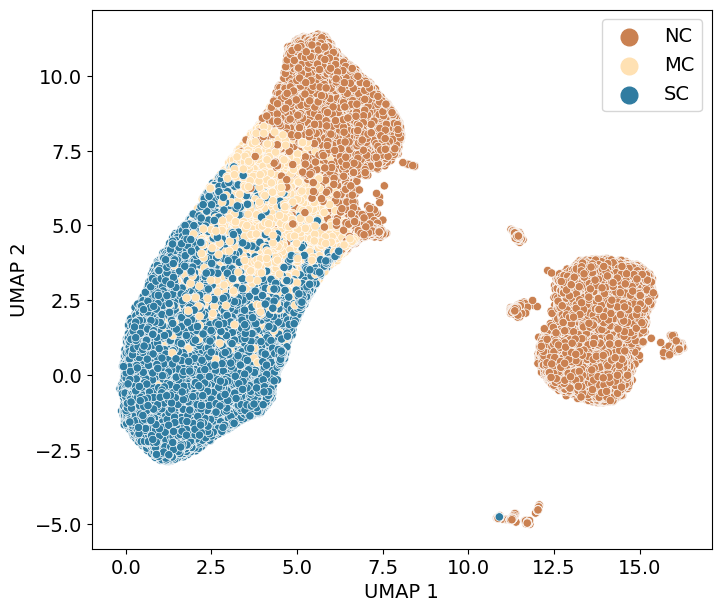

In [12]:
plot_UMAP(Sim_df_lastFrame)

Verifying the differences between the NC clusters:

       sample  replicate      UMAP1     UMAP2 label  probabilities
0           0          0   6.501526  4.371171     1            1.0
1           0          1   6.202521  4.076374     1            1.0
2           0          2  13.683423  3.262182     0            1.0
3           0          3  14.743344  3.518149     0            1.0
4           0          4  13.972880  0.397476     0            1.0
...       ...        ...        ...       ...   ...            ...
99995    9999          5  12.416154 -0.079478     0            1.0
99996    9999          6  14.225667  3.084561     0            1.0
99997    9999          7   6.423583  7.284491     1            1.0
99998    9999          8  13.938170 -0.096351     0            1.0
99999    9999          9  14.563489  2.276777     0            1.0

[100000 rows x 6 columns]
       sample  replicate     UMAP1      UMAP2 label  probabilities
24898    2489          8  5.164651  10.922350   NC1            1.0
25465    2546          5  5.655888 

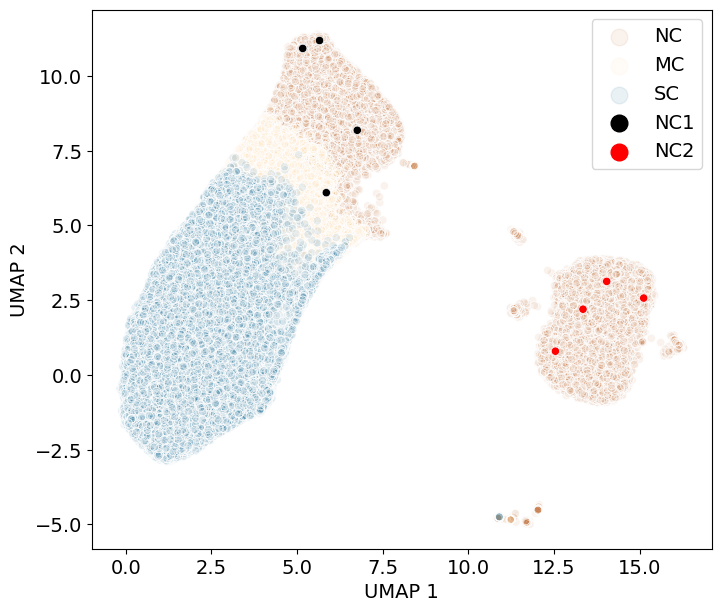

In [13]:
plot_UMAP(Sim_df_lastFrame,NumSamples=4)

Plotting the average of trajectories replicates (matrix shape = (10k, 2325))

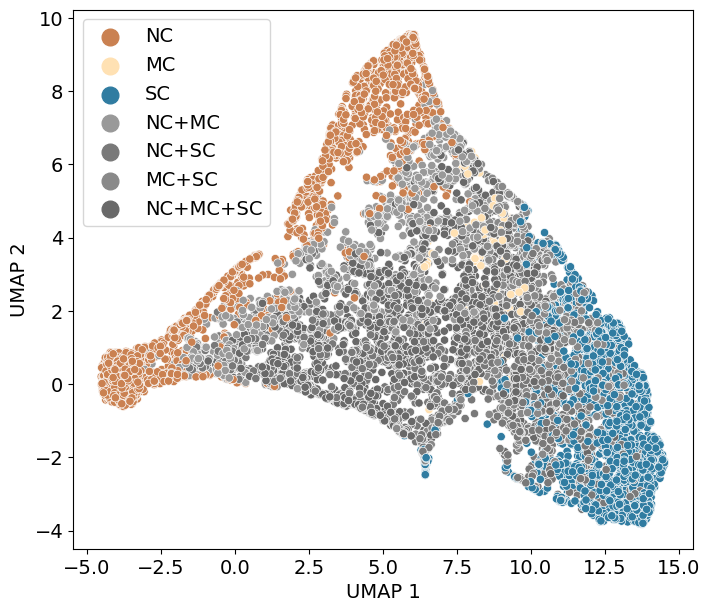

In [14]:
plot_UMAP_MeanPatients(Pat_df_7classes)